# パーセプトロン

In [1]:
import numpy as np

class Parceptoron(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        
        rgen = np.random.RandomState(self.random_state)
        # 重みを乱数で初期化している
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0 
            
            for xi, target in zip(X, y):
                
                update = self.eta * (target - self.predict(xi))
                
                # 1~n 個のデータに対して重みを更新する
                self.w_[1:] += update * xi
                # 0番目は w0=θ, x0=1であったことを思い出そう
                self.w_[0] += update
                
                errors += int(update != 0.0)
            
            self.errors_.append(errors)
        
        return self
    
    
    def net_input(self, X):
        """
        総入力 z を計算する
        重みと入力の内積と、w0（バイアスユニット）を足し合わせたものが今想定している総入力である。
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    
    def predict(self, X):
        """
        総入力が０を超えたら、閾値を超えたとみなし発火する。
        その際に正解なら+1、誤分類なら-1のラベルを付けている
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import os
import pandas as pd
#s = os.path.join("https://archive.ics.uci.edu", "ml", "machine-learning-databases", "iris", "iris.data")
df = pd.read_csv('../data/iris.data', header=None, encoding="utf-8")
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Iris-setosaとIris-versicolorのそれぞれ50枚の花に対する情報を扱う。まずデータフレームから条件に合うものだけを引っ張り出してくる。（1〜100行目までに並んでいることに留意）

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
y = df.iloc[0:100, 4].values # 1-100行目の4列目のDataFameの値だけを返す
y = np.where( y== 'Iris-setosa', -1, 1) # 文字列を扱いやすいように数字に変換する

X = df.iloc[0:100, [0,2]].values # 1-100行目、1列目と3列目のデータを返す

X.shape

(100, 2)

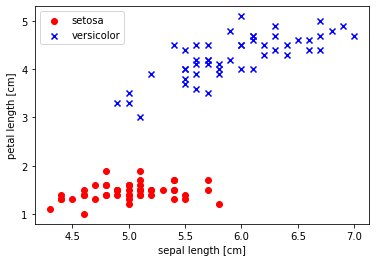

In [5]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel("sepal length [cm]") # 花びらのがく片
plt.ylabel("petal length [cm]") # 花びらの長さ

plt.legend(loc="best")
plt.show()

今回は花びらの長さ、がくの長さから総入力を計算して、setosa（ヒオウギアヤメ）とversicolor（ブルーフラッグ）の分類を試みる。
100個のデータに対してその都度重みを更新していき（1エポック）、その時に何回更新が行われたかを示す。

下図によると、5エポック終了後重みの更新が一回もされなかったため、パーセプトロンは収束したと考えることができる。

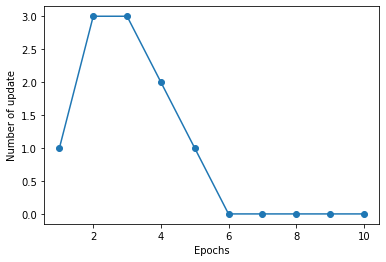

In [6]:
ppn = Parceptoron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')

plt.xlabel("Epochs")
plt.ylabel("Number of update")
plt.show()

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:,1].max()+1
    
    xx1, xx2 = np.meshgrid( 
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        
        plt.scatter(
            x=X[y==cl, 0],
            y=X[y==cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black',
        )

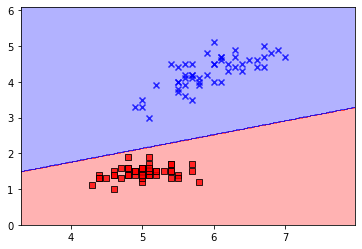

In [8]:
plot_decision_regions(X, y, classifier=ppn)
plt.show()

# ADALINE

In [16]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        
        rgen = np.random.RandomState(self.random_state)
        # 重みを乱数で初期化している
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            
            # 総入力（net input）の計算
            net_input = self.net_input(X)
            # 活性化関数の出力
            output = self.activation(net_input)
            # 真のラベルと比較、重みの更新
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # コスト関数の計算
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        
        return self    
    
    
    def net_input(self, X):
        """
        総入力 z を計算する
        重みと入力の内積と、w0（バイアスユニット）を足し合わせたものが今想定している総入力である。
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def activation(self, X):
        return X
    
    
    def predict(self, X):
        """
        総入力が０を超えたら、閾値を超えたとみなし発火する。
        その際に正解なら+1、誤分類なら-1のラベルを付けている
        """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

２つの学習率の違いによるエポック毎のコストをプロットしてみる。エポックが進む（学習が進む）につれてコスト関数が小さくなっていくのが理想ではあるが、左（$\eta=0.01$）ではコスト関数が収束していないことが見て取れる。また右（$\eta=0.001$）ではコストが減少していることが分かるが、さらに学習を進めないと収束しない様子も分かる。

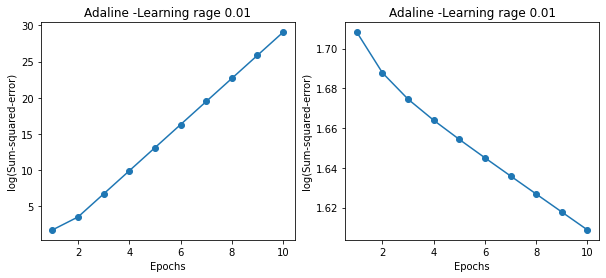

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')

ax[0].set_title('Adaline -Learning rage 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada1.cost_)+1), np.log10(ada2.cost_), marker='o')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')

ax[1].set_title('Adaline -Learning rage 0.01')

plt.show()

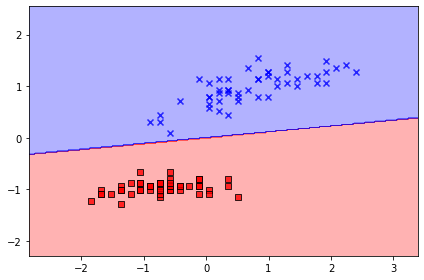

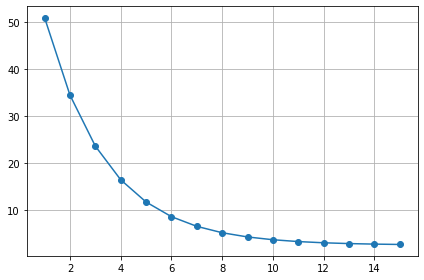

In [22]:
# ディープコピー
X_std = np.copy(X) 
# 標準化（特徴量のスケーリング）
X_std[:, 0] = (X[:,0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:,1] - X[:, 1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_)+1), ada_gd.cost_, marker='o')

plt.tight_layout()
plt.grid()
plt.show()

In [2]:
from numpy.random import seed

class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = False
        self.random_state = random_state 
        
        
    def fit(self, X, y):
        """訓練データに適合させる（フィット）"""
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        
        return self
    
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        
        else:
            self._update_weights(X,y)
        
        return self

    
    def _shuffle(self, X, y):
        r = self.rgen.permuation(len(y))
        return X[r], y[r]
    
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initiralized = True
        
    
    def _update_weights(self, xi, target):
        """ADALINEの学習規則を用いて重みを更新する"""
        # 活性化関数の出力値
        output = self.activation(self.net_input(xi))
        # 真のラベルとの差
        error = target - output
        # 重みの更新
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0:] += self.eta * error
        # コスト関数の計算
        cost = 0.5 * error**2
        return cost
    
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def activation(self, X):
        return X
    
    
    def predict(self, X):
        """
        予測されるクラスラベルを返す
        ADALINEでは活性化関数の出力値を、閾値関数を通して判定する
        ここではwhereを使って階段関数を表現している
        """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
        
        

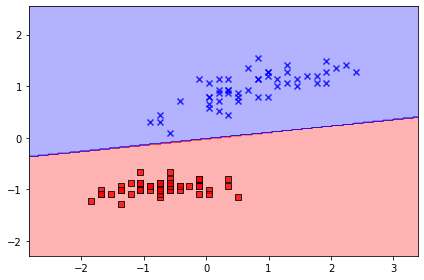

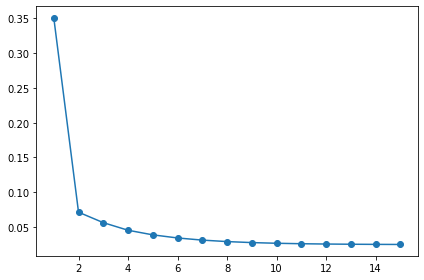

In [36]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_)+1), ada_sgd.cost_, marker='o')
plt.tight_layout()
plt.show()